# Imdb Movie Reviews Classification

#### Notebook Configurations

In [1]:
from IPython.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))

#### Library Imports

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import imdb

### Load dataset

In [3]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

#### Decode any review

In [6]:
word_index = imdb.get_word_index()

reverse_word_index = {v: k for k, v in word_index.items()}


def decode_review(review):
    """Convert a review from integers to words"""

    return " ".join(reverse_word_index.get(word) for word in review)

In [7]:
decode_review(train_data[5])

'the effort still been that usually makes for of finished sucking ended and an because before if just though something know novel female i i slowly lot of above and with connect in of script their that out end his and i i'

#### Vectorize Data

Out train and test data is an array of integers which we cannot feed to our neural network.
So we need to convert the data to `tensors` which a neural network will understand.
Let's OneHot encode our data so each datapoint has a fix width of `10000` with `1`'s in places where a common word exists and `0` otherwise.

In [8]:
def vectorize_sequences(sequences, dimension=10000):
    """One Hot encodes the imdb data so integers are mapped to 0 and 1"""

    results = np.zeros((len(sequences), dimension))

    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0

    return results

In [9]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [12]:
x_train, x_test

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]))

On a similar note out labels need to be vectorized as well

In [13]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [14]:
y_train, y_test

(array([1., 0., 0., ..., 0., 1., 0.], dtype=float32),
 array([0., 1., 1., ..., 0., 0., 0.], dtype=float32))

#### Model Definition

We have inputs as vectors and labels as `scalars.` 
- The type of network that works best for such type of problems is a simple stack of fully connected `(dense)` layers with `relu` activations. 

Let's use 
- two intermediate layers with `16 hidden units` each having `relu` activation
- a third layer that will output a `scalar` prediction having `sigmoid` activation

In [15]:
from keras import models
from keras import layers

#### Build model architecture

In [17]:
model = models.Sequential()
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

#### Compiling the Model

In [18]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

#### Validation

Let's create a validation set by setting apart `10000` samples from the original training data

In [19]:
x_val, y_val = x_train[:10000], y_train[:10000]

partial_x_train, partial_y_train = x_train[10000:], y_train[10000:]

#### Train

In [20]:
history = model.fit(
    x=partial_x_train,
    y=partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/20
30/30 [==============================] - 2s 44ms/step - loss: 0.5047 - accuracy: 0.7874 - val_loss: 0.3778 - val_accuracy: 0.8754
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.3032 - accuracy: 0.9045 - val_loss: 0.3366 - val_accuracy: 0.8668
Epoch 3/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2225 - accuracy: 0.9299 - val_loss: 0.2850 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1770 - accuracy: 0.9434 - val_loss: 0.2752 - val_accuracy: 0.8897
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1431 - accuracy: 0.9551 - val_loss: 0.2777 - val_accuracy: 0.8890
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.1189 - accuracy: 0.9637 - val_loss: 0.2960 - val_accuracy: 0.8869
Epoch 7/20
30/30 [==============================] - 0s 14ms/step - loss: 0.0959 - accuracy: 0.9725 - val_loss: 0.3100 - val_accuracy: 0.8854
Epoch 8/20
30

#### Plot training and validation loss

In [21]:
history_dict = history.history

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]

epochs = range(1, len(acc) + 1)

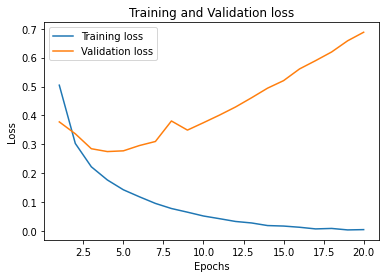

In [22]:
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label="Validation loss")

plt.title("Training and Validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

#### Plot Training Vs Validation Accuracy

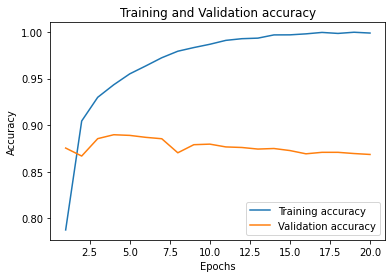

In [23]:
plt.plot(epochs, acc, label="Training accuracy")
plt.plot(epochs, val_acc, label="Validation accuracy")

plt.title("Training and Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

#### Observations

- The model clearly seem to overfit after `4` epochs
- We can see how to validation loss is increasing after each epoch
- Since we have a comparatively small dataset we should avoid over complexity

Let's train a new network from scratch for `4` epochs and then evaluate on test data

#### Retrain

In [58]:
model = models.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 11ms/step - loss: 0.4408 - accuracy: 0.8306
Epoch 2/4
49/49 [==============================] - 0s 8ms/step - loss: 0.2544 - accuracy: 0.9098
Epoch 3/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1968 - accuracy: 0.9292
Epoch 4/4
49/49 [==============================] - 0s 8ms/step - loss: 0.1644 - accuracy: 0.9416


In [25]:
test_loss, test_acc = model.evaluate(x_test, y_test)

782/782 [==============================] - 1s 1ms/step - loss: 0.3000 - accuracy: 0.8810


In [26]:
print(f"Test Loss: {test_loss*100:.2f}%\nTest Accuracy: {test_acc*100:.2f}%")

Test Loss: 30.00%
Test Accuracy: 88.10%


#### Observation

- So we are able to achieve an accuracy of `88%` with this simple technique. 
- Remember each review in our original dataset just has the top `10000` words in it.
- Now let's do the predictions on the entire test dataset and show a random review with its `actual` and `predicted` sentiment

#### Predict

In [29]:
y_pred = model.predict(x_test)

In [31]:
n = random.randint(0, 25000)
review, sentiment, sentiment_pred = (
    decode_review(test_data[n]),
    test_labels[n],
    y_pred[n][0],
)
print(
    f"Review\n\n{review}\n\nSentiment Actual: {sentiment}\nSentiment Prediction Probability: {sentiment_pred:.2f}"
)

Review

the such mother such off from one in classic to could is ' in by br of suspense battle characters br an my of on it is manner beings are us happy to real one best will way unoriginal and pointless br pg ill it so show of try lasts br be e and movie pg ill other of ill being it his done that's in tears so problem on which ten ladies raines pocket rent after his agency as caruso br performers film's wonder people his hope man my are as learn out character of i've cast

Sentiment Actual: 0
Sentiment Prediction Probability: 0.01


### Further experimentation

We try a model with `three` hidden layers

In [146]:
model = models.Sequential()

model.add(layers.Dense(16, activation="tanh", input_shape=(10000,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=15,
    batch_size=512,
    validation_data=(x_val, y_val),
)

Epoch 1/15
30/30 [==============================] - 1s 33ms/step - loss: 0.5026 - accuracy: 0.7895 - val_loss: 0.3826 - val_accuracy: 0.8706
Epoch 2/15
30/30 [==============================] - 0s 14ms/step - loss: 0.3041 - accuracy: 0.9057 - val_loss: 0.3037 - val_accuracy: 0.8882
Epoch 3/15
30/30 [==============================] - 0s 13ms/step - loss: 0.2222 - accuracy: 0.9310 - val_loss: 0.2862 - val_accuracy: 0.8845
Epoch 4/15
30/30 [==============================] - 0s 13ms/step - loss: 0.1672 - accuracy: 0.9493 - val_loss: 0.2755 - val_accuracy: 0.8868
Epoch 5/15
30/30 [==============================] - 0s 13ms/step - loss: 0.1334 - accuracy: 0.9599 - val_loss: 0.2813 - val_accuracy: 0.8880
Epoch 6/15
30/30 [==============================] - 0s 13ms/step - loss: 0.1085 - accuracy: 0.9665 - val_loss: 0.3356 - val_accuracy: 0.8795
Epoch 7/15
30/30 [==============================] - 0s 13ms/step - loss: 0.0862 - accuracy: 0.9748 - val_loss: 0.3271 - val_accuracy: 0.8777
Epoch 8/15
30

In [147]:
d = history.history
loss, accuracy, val_loss, val_accuracy = (
    d["loss"],
    d["accuracy"],
    d["val_loss"],
    d["val_accuracy"],
)
epochs = range(1, len(loss) + 1)

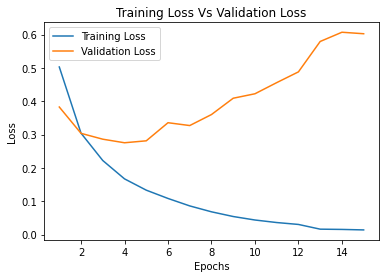

In [148]:
plt.plot(epochs, loss, label="Training Loss")
plt.plot(epochs, val_loss, label="Validation Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Vs Validation Loss")
plt.legend()

plt.show()

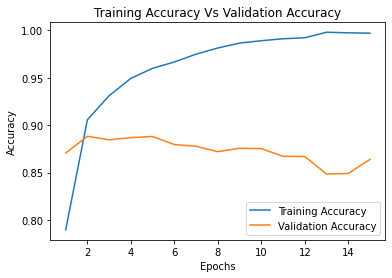

In [149]:
plt.plot(epochs, accuracy, label="Training Accuracy")
plt.plot(epochs, val_accuracy, label="Validation Accuracy")

plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Vs Validation Accuracy")
plt.legend()

plt.show()

In [62]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print(
    f"""
test loss    :  {test_loss*100:.2f}%
test accuracy:  {test_acc*100:.2f}%
"""
)

782/782 [==============================] - 1s 877us/step - loss: 0.5277 - accuracy: 0.8511

test loss    :  52.77%
test accuracy:  85.11%



### The End